In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import yfinance as yf
from datetime import datetime


# 1. Data Collection

In [2]:
now = datetime.now()

start = datetime(now.year-10, now.month, now.day)
end = now 
ticker = 'AAPL'
df = yf.download(ticker, start, end)

C:\Users\mdawl\AppData\Local\Temp\ipykernel_15432\1729997279.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start, end)
[*********************100%***********************]  1 of 1 completed


In [3]:
df 

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-06-22,28.580410,28.681194,28.461708,28.553533,136157200
2015-06-23,28.450504,28.580405,28.416909,28.551290,121075600
2015-06-24,28.692385,29.070889,28.470658,28.490814,221123600
2015-06-25,28.555771,28.936514,28.555771,28.860366,127752400
2015-06-26,28.387793,28.665511,28.334041,28.593842,176267200
...,...,...,...,...,...
2025-06-13,196.449997,200.369995,195.699997,199.729996,51447300
2025-06-16,198.419998,198.690002,196.559998,197.300003,43020700


# 2. Data Exploration & Visualization

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.shape

(2515, 5)

In [6]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,102.814862,103.846577,101.670566,102.716125,1.100509e+08
std,68.795636,69.470268,68.028469,68.718048,6.448818e+07
min,20.647457,20.951431,20.448617,20.569748,2.323470e+07
25%,38.356310,38.900916,38.058453,38.322398,6.713170e+07
50%,85.561539,86.368339,84.866488,85.410869,9.462560e+07
75%,163.158661,164.674596,161.660248,163.084330,1.339464e+08
max,258.396667,259.474086,257.010028,257.568678,6.488252e+08


In [7]:
df.dtypes

Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object

In [8]:
df = df.reset_index()

In [9]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-06-22,28.580410,28.681194,28.461708,28.553533,136157200
1,2015-06-23,28.450504,28.580405,28.416909,28.551290,121075600
2,2015-06-24,28.692385,29.070889,28.470658,28.490814,221123600
3,2015-06-25,28.555771,28.936514,28.555771,28.860366,127752400
4,2015-06-26,28.387793,28.665511,28.334041,28.593842,176267200


Text(0.5, 0, 'Days')

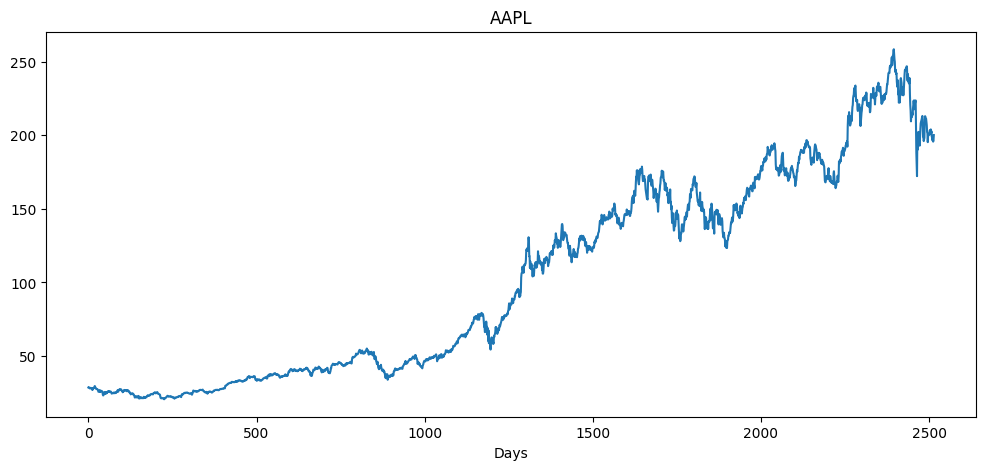

In [10]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days')

# 3. Feature Engineering

## 100 days Moving Average 

In [11]:
df['MA_100'] = df.Close.rolling(100).mean()
df.head()

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-06-22,28.580410,28.681194,28.461708,28.553533,136157200,NaN
1,2015-06-23,28.450504,28.580405,28.416909,28.551290,121075600,NaN
2,2015-06-24,28.692385,29.070889,28.470658,28.490814,221123600,NaN
3,2015-06-25,28.555771,28.936514,28.555771,28.860366,127752400,NaN
4,2015-06-26,28.387793,28.665511,28.334041,28.593842,176267200,NaN


In [12]:
df.head(103)

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-06-22,28.580410,28.681194,28.461708,28.553533,136157200,NaN
1,2015-06-23,28.450504,28.580405,28.416909,28.551290,121075600,NaN
2,2015-06-24,28.692385,29.070889,28.470658,28.490814,221123600,NaN
3,2015-06-25,28.555771,28.936514,28.555771,28.860366,127752400,NaN
4,2015-06-26,28.387793,28.665511,28.334041,28.593842,176267200,NaN
...,...,...,...,...,...,...,...
98,2015-11-09,27.242029,27.522199,27.124539,27.330147,135485600,NaN
99,2015-11-10,26.383440,26.677167,26.223020,26.412814,236511600,26.361945
100,2015-11-11,26.234314,26.530300,26.030964,26.293060,180872000,26.338484


## 200 dyas Moving Average

In [13]:
df['MA_200'] = df.Close.rolling(200).mean()
df.head(203)

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2015-06-22,28.580410,28.681194,28.461708,28.553533,136157200,NaN,NaN
1,2015-06-23,28.450504,28.580405,28.416909,28.551290,121075600,NaN,NaN
2,2015-06-24,28.692385,29.070889,28.470658,28.490814,221123600,NaN,NaN
3,2015-06-25,28.555771,28.936514,28.555771,28.860366,127752400,NaN,NaN
4,2015-06-26,28.387793,28.665511,28.334041,28.593842,176267200,NaN,NaN
...,...,...,...,...,...,...,...,...
198,2016-04-05,24.945499,25.154497,24.856903,24.877350,106314800,23.782591,NaN
199,2016-04-06,25.206745,25.211290,24.806926,25.040912,105616400,23.770824,25.066384
200,2016-04-07,24.656994,25.084072,24.561583,24.977302,127207600,23.755050,25.046767


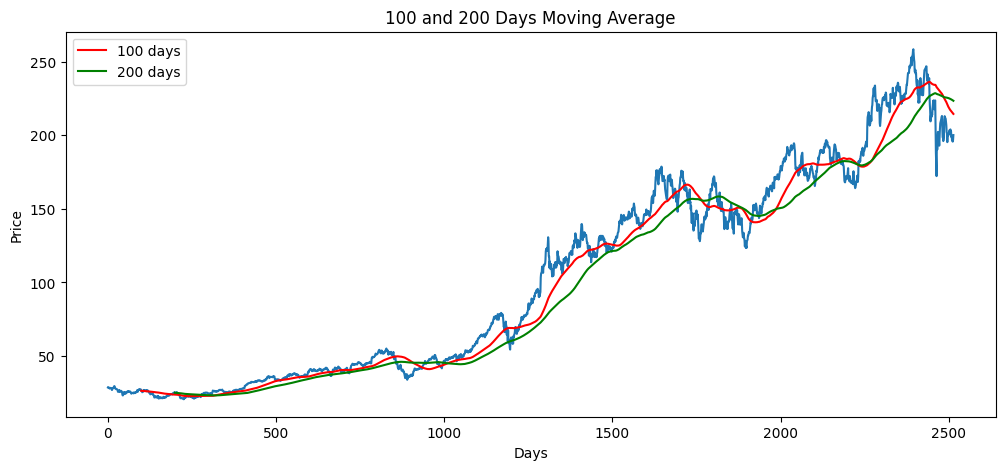

In [14]:
plt.figure(figsize=(12, 5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r', label = '100 days')
plt.plot(df['MA_200'], 'g', label = '200 days')
plt.title('100 and 200 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()

### Calculating % change in each trading session

In [15]:
df['Percentage Changed'] = df.Close.pct_change()
df[['Close', 'Percentage Changed']]

Price,Close,Percentage Changed
Ticker,AAPL,
0,28.580410,NaN
1,28.450504,-0.004545
2,28.692385,0.008502
3,28.555771,-0.004761
4,28.387793,-0.005882
...,...,...
2510,196.449997,-0.013805
2511,198.419998,0.010028
2512,195.639999,-0.014011


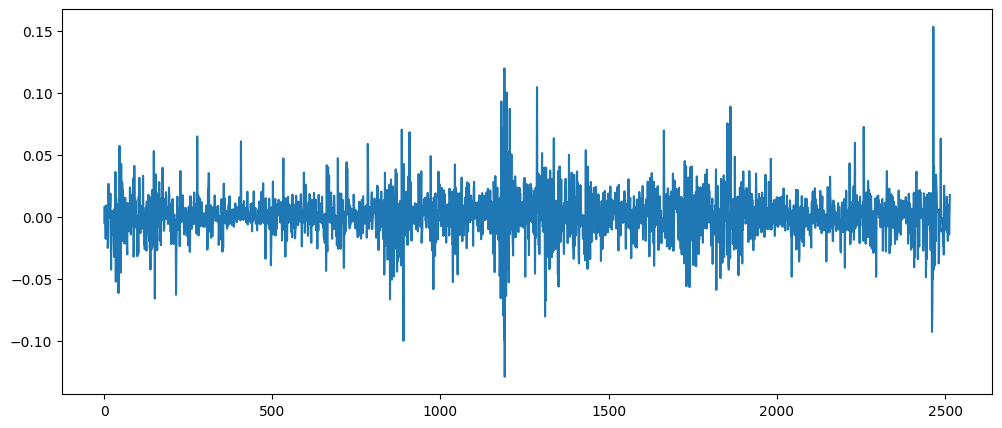

In [16]:
plt.figure(figsize=(12, 5))
plt.plot(df['Percentage Changed'])

# 4. Data Preprocessing 

In [17]:
# Splitting data into Training and Testing datasets 
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7):int(len(df))])

print(data_training)
print(data_testing)

Ticker        AAPL
0        28.580410
1        28.450504
2        28.692385
3        28.555771
4        28.387793
...            ...
1755    140.387711
1756    134.964722
1757    129.797638
1758    130.663712
1759    133.291565

[1760 rows x 1 columns]
Ticker        AAPL
1760    128.006348
1761    129.482651
1762    133.724625
1763    133.212845
1764    136.086700
...            ...
2510    196.449997
2511    198.419998
2512    195.639999
2513    196.580002
2514    200.080002

[755 rows x 1 columns]


In [18]:
data_training

Ticker,AAPL
0,28.580410
1,28.450504
2,28.692385
3,28.555771
4,28.387793
...,...
1755,140.387711
1756,134.964722
1757,129.797638
1758,130.663712


### Scalling down the data between 0 and 1 

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scler = MinMaxScaler(feature_range=(0, 1))

In [44]:
data_training_array = scler.fit_transform(data_training)

# 5. Sequence Creation

In [22]:
X_train = [] 
y_train = []

for i in range(100, data_training_array.shape[0]):
    X_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [23]:
X_train.shape

(1660, 100, 1)

# 6. Model Building

In [24]:
import tensorflow as tf 
print(tf.__version__)

2.19.0


In [25]:
# ML Model 
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [28]:
model = Sequential()
model.add(Input(shape = (100, 1)))
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(LSTM(units=64, activation='tanh',))
model.add(Dense(32))
model.add(Dense(16))
model.add(Dense(1))


# 7. Model Training

In [33]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 0.0208
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 6.3916e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 5.0533e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 5.2985e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 4.2100e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 4.1834e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 4.2825e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 4.6635e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 4.3354e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 3.9706e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 3.4818e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 3.8999e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 3.1919e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 4.8986e-04
Epoch 15/50
52/52 ━

In [34]:
# Save the model 
model.save('stock_prediction_model.keras')

# 8. Preparing Test Data 

In [37]:
past_100_days = data_training.tail(100)

In [39]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [46]:
input_data = scler.fit_transform(final_df)

In [49]:
X_test= []
y_test = []

for i in range(100, input_data.shape[0]):
    X_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

In [50]:
X_test, y_test = np.array(X_test), np.array(y_test)

In [53]:
y_predicrted = model.predict(X_test)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


In [55]:
y_predicrted.shape

(755, 1)

In [56]:
y_predicrted = scler.inverse_transform(y_predicrted.reshape(-1, 1)).flatten()
y_test = scler.inverse_transform(y_test.reshape(-1, 1)).flatten()

In [57]:
y_predicrted.shape

(755,)

In [58]:
y_test.shape

(755,)

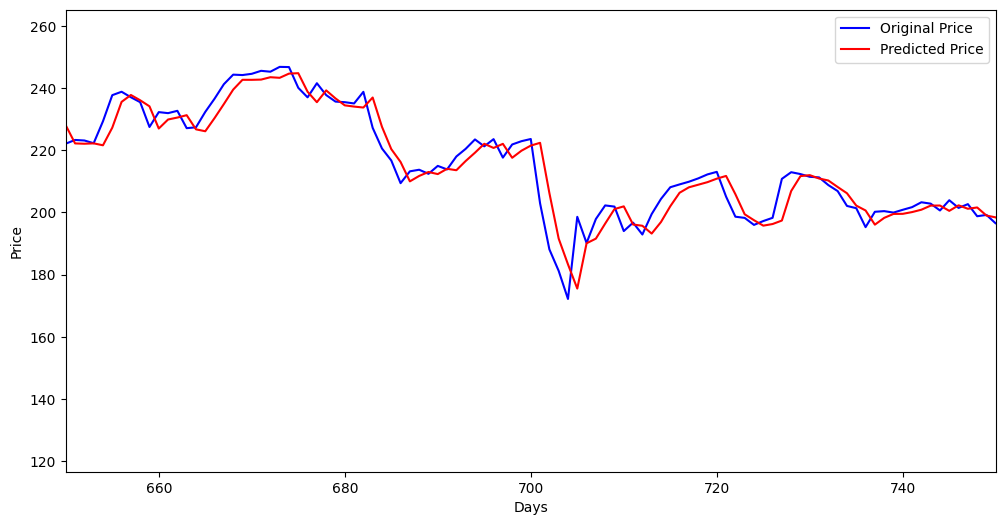

In [61]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicrted, 'r', label = 'Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.xlim(650, 750)
plt.show()


# 10. Model Evaluation

In [68]:
# Mean Square Error (MSE)
from sklearn.metrics import mean_squared_error, r2_score


In [65]:
mse = mean_squared_error(y_test, y_predicrted)
print(f"Mean Squared Error (MSE) : {mse}")

Mean Squared Error (MSE) : 12.590881449755958


In [66]:
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE) : {rmse}")

Root Mean Squared Error (RMSE) : 3.5483632071359263


In [69]:
# R-Squared 
r2 = r2_score(y_test, y_predicrted)
print(f"R-Squared: {r2}")

R-Squared: 0.9877092574456544
